In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X,y =make_regression(n_features=5,noise=15,bias=10,random_state=1)

In [3]:
X.shape,y.shape

((100L, 5L), (100L,))

In [4]:
X

array([[ 1.25286816e+00,  5.12929820e-01,  4.88518147e-01,
        -2.98092835e-01, -7.54397941e-01],
       [ 5.02740882e-01,  1.55880554e+00, -1.21974440e+00,
         1.09402696e-01,  1.61694960e+00],
       [ 1.19783084e+00,  1.70459417e+00, -9.18440038e-01,
         1.04008915e+00,  5.92472801e-01],
       [ 3.53600971e-02, -1.53879325e+00,  6.17985534e-01,
        -4.47895185e-01,  8.52704062e-01],
       [-2.03720123e+00, -1.94258918e+00, -2.11416392e+00,
        -2.50644065e+00, -6.18036848e-01],
       [ 3.15159392e-01,  8.46160648e-01,  3.50545979e-01,
        -8.59515941e-01, -1.37311732e+00],
       [ 1.11813340e+00,  6.74396105e-01,  1.09899633e+00,
        -7.22391905e-01, -5.32234021e-01],
       [ 1.61336137e+00, -3.74804687e-01,  2.05462410e+00,
        -7.49969617e-01, -2.28765829e-01],
       [ 6.54580153e-01, -5.11884476e-02, -8.67768678e-01,
        -7.25597119e-01,  8.24584625e-01],
       [-1.52568032e+00,  7.95026094e-01,  1.34048197e-01,
        -3.74438319e-01

In [5]:
y

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488,    7.34240026,  128.75463228,
        -60.93313486,  -61.19552522,   78.57344398,  -99.24295028,
        -24.11474459,   27.93261209,   60.20364547,   76.69635597,
         27.35273335,  -98.47323727,   38.17049758,   -4.73448628,
        103.64949702,  -16.42943377,   18.74796224,   24.8427114 ,
        -43.65707972,  -67.50622782,  120.68809451,  128.70155229,
        -50.13799548,  -42.5395947 ,   -0.71546723,  -63.41732037,
         70.89810466,   12.96967499,  134.1145324 ,   -1.41365139,
         17.86345919,  -21.47093119,    1.6996949 ,   89.90570884,
        -18.71582053,  -84.64655926,   58.21622616,   43.23822281,
         -9.50925036,   17.86491741,  -72.9789859 ,  -12.56745961,
         76.25536681,  109.23988899,  110.04494747,  -27.02679241,
         12.12984057,   22.45351765,   92.70386048,   88.94823

In [75]:
class CustomLinearReg:
    
    def __init__(self,lr=0.1,iters=10):
        self.lr=lr
        self.iters=iters
    
    def fit(self,X,y):
        self.coef_=np.random.randn(X.shape[1],1)
        self.bias_=np.random.randn()
        
        errors=[]
        for i in range(self.iters):
            error=self.gradient_decend(X,y)
            errors.append(error)
            return errors
            
    def gradient_decend(self,X,y):
        delta_coef,delta_bias,error=self.gradient(X,y)
        print(delta_coef,delta_bias)
        self.coef_+=delta_coef
        self.bias_+=delta_bias
        return error
        
    def gradient(self,X,y):
        ya=y.reshape(-1,1)
        yh=self.hypo(X)
        dmsedm=np.dot(X.T,(yh-ya))/len(X)
        dmsedc=np.mean(2*(yh-ya))
        delta_coef=-dmsedm*self.lr
        delta_bias=-dmsedc*self.lr
        return delta_coef,delta_bias,np.mean((yh-ya)**2)
    
    def hypo(self,X):
        return np.dot(X,self.coef_)+self.bias_
    
    def predict(self,X):
        return self.hypo(X).flatten()

In [113]:
model=CustomLinearReg(lr=0.7,iters=1000)
errors= model.fit(X,y)

(array([[ 7.47597282],
       [41.9917796 ],
       [24.30576895],
       [15.82913438],
       [13.20586779]]), 27.96534415474461)


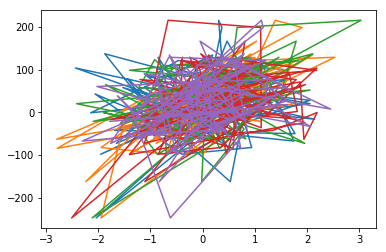

In [114]:
plt.plot(X,y)

In [115]:
model.coef_,model.bias_

(array([[ 6.73117326],
        [42.42903926],
        [22.77788563],
        [17.37224731],
        [13.671908  ]]), 28.650466862279004)

In [116]:
type(errors)

list

In [117]:
model.predict(X[:10])

array([  54.48166774,   94.3972828 ,  114.28636428,  -18.44748786,
       -167.632914  ,   40.95348171,   69.99738265,   54.25134879,
          9.78713947,   50.11380841])

In [118]:
y[:10]

array([  43.5171099 ,   57.65141943,  123.08271761,  -43.37373343,
       -247.57689921,    8.53711187,   41.42818339,   51.97005873,
        -20.65603669,   57.77285488])